In [1]:
import perceval as pcvl
from perceval.components import catalog
from perceval.converters import QiskitConverter
from perceval.algorithm import Analyzer, Sampler

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


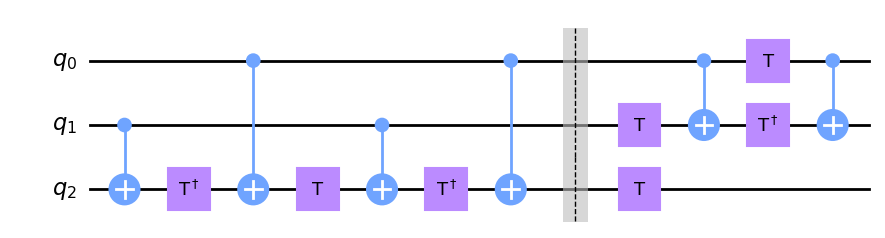

In [2]:
qc = QuantumCircuit(3) # qiskit circuit
qc.cx(1,2)
qc.tdg(2)
qc.cx(0,2)
qc.t(2)
qc.cx(1,2)
qc.tdg(2)
qc.cx(0,2)
qc.barrier()
qc.t(1)
qc.t(2)
qc.cx(0,1)
qc.tdg(1)
qc.t(0)
qc.cx(0,1)

qc.draw(output='mpl')

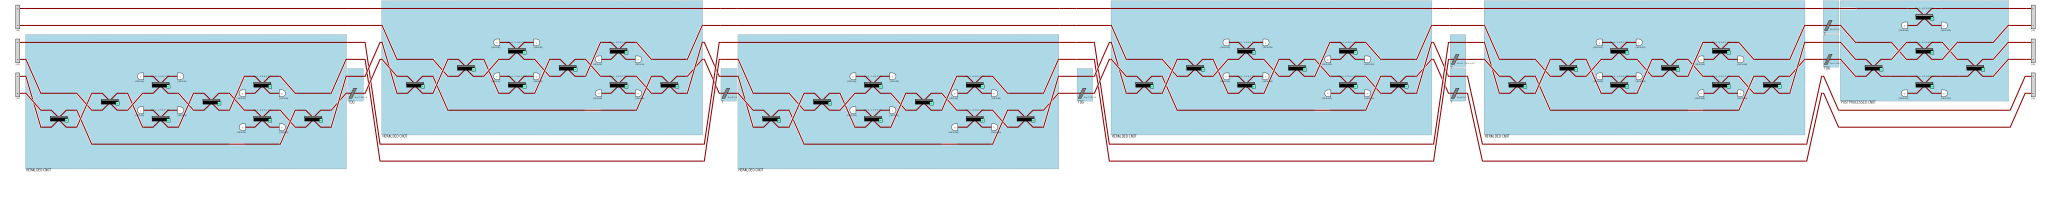

In [3]:
qiskit_converter = QiskitConverter(catalog, backend_name="Naive")
quantum_processor = qiskit_converter.convert(qc, use_postselection=True)
pcvl.pdisplay(quantum_processor, recursive=True)

In [5]:
quantum_processor.with_input(pcvl.LogicalState([0,0,0]))
sampler = Sampler(quantum_processor)

In [6]:
# Uncomment the following line if you and your computer are brave enough
# output_distribution = sampler.probs()["results"]

In [8]:
u = quantum_processor.linear_circuit().compute_unitary(use_symbolic=False)

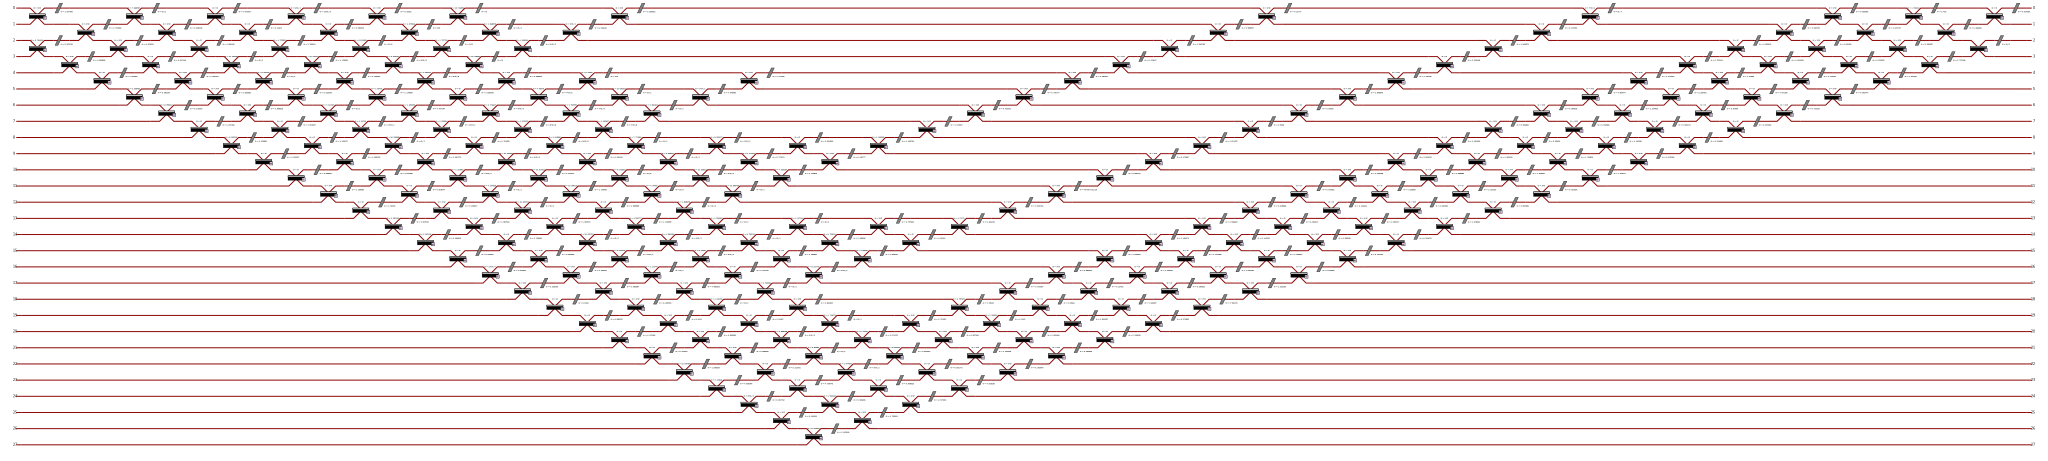

In [9]:
# This is where the parameters should be tuned
ub = (pcvl.Circuit(2)
      // pcvl.BS(theta=pcvl.Parameter("theta"))
      // (0, pcvl.PS(phi=pcvl.Parameter("φ_a"))))

pc_norm = pcvl.Circuit.decomposition(u, ub, shape="triangle")
pcvl.pdisplay(pc_norm, compact=True, render_size=0.5)